In [1]:
import numpy as np
import argparse
import os, time

from pykin.utils import plot_utils as p_utils

from pytamp.benchmark import Rearrange1
from pytamp.benchmark.rearrange1 import make_scene
from pytamp.search.mcts_for_rearragement import MCTS_rearrangement
from pytamp.utils import point_cloud_utils as pc_utils

def get_parser():
    parser = argparse.ArgumentParser(description="Test Rearragement 1.")
    parser.add_argument("--budgets", metavar="T", type=int, default=30, help="Horizon")
    parser.add_argument("--max_depth", metavar="H", type=int, default=16, help="Max depth")
#     parser.add_argument("--seed", metavar="i", type=int, default=7, help="A random seed")
#     parser.add_argument("--seed", metavar="i", type=int, default=17, help="A random seed")
    parser.add_argument("--seed", metavar="i", type=int, default=22, help="A random seed")
    parser.add_argument(
        "--algo",
        metavar="alg",
        type=str,
        default="bai_perturb",
        choices=["bai_perturb", "bai_ucb", "uct", "random", "greedy"],
        help="Choose one (bai_perturb, bai_ucb, uct)",
    )
    parser.add_argument(
        "--debug_mode", default=False, type=lambda x: (str(x).lower() == "true"), help="Debug mode"
    )
#     parser.add_argument("--box_number", metavar="N", type=int, default=6, help="Box Number(6 or less)")
    try:
        args = parser.parse_args() #call from command line
    except:
        args = parser.parse_args(args=[]) #call from notebook
    return args 

args = get_parser() 

debug_mode = args.debug_mode
# debug_mode = True
budgets = args.budgets
max_depth = args.max_depth
algo = args.algo
seed = args.seed
np.random.seed(seed)

object_names, init_scene, goal_scene = make_scene()
rearrangement1 = Rearrange1('panda', object_names, init_scene, goal_scene, is_pyplot=False)

final_level_1_values = []
final_level_2_values = []
final_optimal_nodes = []
final_pnp_all_joint_paths = []
final_pick_all_objects = []
final_place_all_object_poses = []

# final_optimal_trees = []
c_list = 10 ** np.linspace(-2, 2.0, 10)


2023-08-04 21:16:32.967632: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
usage: ipykernel_launcher.py [-h] [--budgets T] [--max_depth H] [--seed i]
                             [--algo alg] [--debug_mode DEBUG_MODE]
ipykernel_launcher.py: error: unrecognized arguments: -f /home/juju/.local/share/jupyter/runtime/kernel-febcd94a-d83a-41a4-b1be-6f34d75052d7.json


*********************** Logical States ***********************
OrderedDict([('ben_cube0',
              {'on': Object(name=table, pos=[ 0.9   -0.6    0.043])}),
             ('bottle0',
              {'on': Object(name=table, pos=[ 0.9   -0.6    0.043])}),
             ('can0',
              {'on': Object(name=table, pos=[ 0.9   -0.6    0.043])}),
             ('cereal0',
              {'on': Object(name=table, pos=[ 0.9   -0.6    0.043])}),
             ('table',
              {'static': True,
               'support': [Object(name=ben_cube0, pos=[ 0.55993829 -0.00222162  0.83529998]),
                           Object(name=bottle0, pos=[ 0.68867991 -0.10153264  0.87515735]),
                           Object(name=can0, pos=[0.63874014 0.27988355 0.85059666]),
                           Object(name=cereal0, pos=[ 0.42131868 -0.18766674  0.88526188])]}),
             ('panda_gripper', {'holding': None})])
***************************************************************

****************

{'table': Object(name=table, pos=[ 0.9   -0.6    0.043]), 'ben_cube0': Object(name=ben_cube0, pos=[0.39587317 0.03565069 0.83529998]), 'bottle0': Object(name=bottle0, pos=[ 0.62089307 -0.32701184  0.87515735]), 'can0': Object(name=can0, pos=[ 0.45938771 -0.22735796  0.85059666]), 'cereal0': Object(name=cereal0, pos=[ 0.57663268 -0.00691541  0.88526188])}
{'table': Object(name=table, pos=[ 0.9   -0.6    0.043]), 'ben_cube0': Object(name=ben_cube0, pos=[ 0.55190957 -0.03581815  0.83529998]), 'bottle0': Object(name=bottle0, pos=[ 0.41998304 -0.12788834  0.87515735]), 'can0': Object(name=can0, pos=[ 0.39348095 -0.01815785  0.85059666]), 'cereal0': Object(name=cereal0, pos=[ 0.52829008 -0.30755704  0.88526188])}


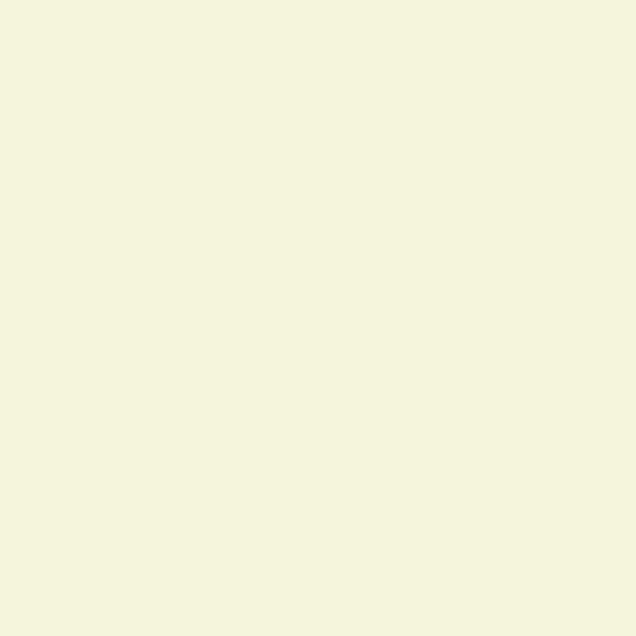

In [2]:
# #######################
fig, ax = p_utils.init_3d_figure(name="Rearrangement 1")
# init_scene
rearrangement1.scene_mngr.render_scene(ax)
rearrangement1.render_axis(rearrangement1.scene_mngr)
rearrangement1.scene_mngr.show()

# goal_scene
rearrangement1.goal_scene_mngr.render_scene(ax)
rearrangement1.render_axis(rearrangement1.goal_scene_mngr)
rearrangement1.goal_scene_mngr.show()

In [2]:
c = 2.5
idx = 0
mcts = MCTS_rearrangement(
        scene_mngr=rearrangement1.scene_mngr,
        init_scene=rearrangement1.init_scene,
        sampling_method=args.algo,
        budgets=args.budgets,
        max_depth=args.max_depth,
        c=c,
        debug_mode=False,
        use_pick_action=True,
        consider_next_scene=True, 
    )
mcts.only_optimize_1 = False

In [ ]:
start_time = time.time()
for i in range(budgets):
# for i in range(10):
    print(
        f"\n[{idx+1}/{len(c_list)}] Benchmark: {rearrangement1.scene_mngr.scene.bench_num}, Algo: {algo}, C: {c}, Seed: {seed}"
    )
    mcts.do_planning_rearrange(i)

    print("########### Running time : ", time.time()- start_time, "##############")
    final_level_1_values.append(mcts.values_for_level_1)



[1/10] Benchmark: 0, Algo: bai_perturb, C: 2.5, Seed: 22
=========== Search iteration : 1 ===========
[Reward] S(0) -> A(2) -> S'(5) Reward : 0
[Action] Rearr bottle0
placed another place not goal
[Reward] S(5) -> A(6) -> S'(7) Reward : -1
[Reward] S(7) -> A(9) -> S'(14) Reward : 0
[Action] Rearr can0
Good Action
[Reward] S(14) -> A(16) -> S'(17) Reward : 2.857
[Reward] S(17) -> A(20) -> S'(22) Reward : 0
[Action] Rearr cereal0
placed another place not goal
[Reward] S(22) -> A(24) -> S'(26) Reward : -1
[Reward] S(26) -> A(27) -> S'(32) Reward : 0
[Action] Rearr ben_cube0
Good Action
[Reward] S(32) -> A(33) -> S'(34) Reward : 1.818
[Reward] S(34) -> A(37) -> S'(38) Reward : 0
[Action] Rearr cereal0
placed another place not goal
[Reward] S(38) -> A(41) -> S'(43) Reward : -1
[Reward] S(43) -> A(46) -> S'(47) Reward : 0
[Action] Rearr can0
Bad Action
[Reward] S(47) -> A(48) -> S'(49) Reward : -3.077
[Reward] S(49) -> A(50) -> S'(56) Reward : 0
Current logical action is None.. Reward is -7

[Reward] S(240) -> A(243) -> S'(244) Reward : 0
[Action] Rearr cereal0
placed another place not goal
[Reward] S(244) -> A(247) -> S'(249) Reward : -1
[Reward] S(249) -> A(250) -> S'(253) Reward : 0
[Action] Rearr ben_cube0
Good Action
[Reward] S(253) -> A(254) -> S'(255) Reward : 1.333
[Reward] S(255) -> A(257) -> S'(259) Reward : 0
[Action] Rearr can0
placed another place not goal
[Reward] S(259) -> A(263) -> S'(264) Reward : -1
[Reward] S(264) -> A(267) -> S'(269) Reward : 0
[Action] Rearr cereal0
Good Action
[Reward] S(269) -> A(274) -> S'(275) Reward : 1.053
Exceeded the maximum depth!!
########### Running time :  20.705994844436646 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 2.5, Seed: 22
=========== Search iteration : 8 ===========
[Reward] S(0) -> A(4) -> S'(66) Reward : 0
[Action] Rearr cereal0
placed another place not goal
[Reward] S(66) -> A(122) -> S'(124) Reward : -1
[Reward] S(124) -> A(125) -> S'(276) Reward : 0
[Action] Rearr ben_cube0
Good Action
[Reward]

[Reward] S(472) -> A(475) -> S'(476) Reward : 0
[Action] Rearr cereal0
placed another place not goal
[Reward] S(476) -> A(477) -> S'(478) Reward : -1
[Reward] S(478) -> A(479) -> S'(483) Reward : 0
[Action] Rearr ben_cube0
Good Action
[Reward] S(483) -> A(485) -> S'(486) Reward : 1.333
[Reward] S(486) -> A(489) -> S'(490) Reward : 0
[Action] Rearr cereal0
placed another place not goal
[Reward] S(490) -> A(491) -> S'(493) Reward : -1
[Reward] S(493) -> A(495) -> S'(497) Reward : 0
[Action] Rearr bottle0
Bad Action
[Reward] S(497) -> A(498) -> S'(499) Reward : -2.353
Exceeded the maximum depth!!
########### Running time :  35.34124231338501 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 2.5, Seed: 22
=========== Search iteration : 13 ===========
[Reward] S(0) -> A(4) -> S'(66) Reward : 0
[Action] Rearr cereal0
placed another place not goal
[Reward] S(66) -> A(122) -> S'(124) Reward : -1
[Reward] S(124) -> A(127) -> S'(129) Reward : 0
[Action] Rearr can0
placed another place n

[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000111


[Reward] S(520) -> A(522) -> S'(525) Reward : 0
[Action] Rearr can0
Good Action
[Reward] S(525) -> A(529) -> S'(530) Reward : 1.333
##########['bottle0', 'cereal0', 'ben_cube0', 'can0']#############
Success!!!!!
Terminal State! Reward is 5
Action Node: 4 Action: Pick cereal0
Action Node: 127 Action: Pick can0
Action Node: 134 Action: Pick bottle0
Action Node: 506 Action: Pick cereal0
Action Node: 511 Action: Pick ben_cube0
Action Node: 522 Action: Pick can0
pick cereal0
solve with LM1
Iterators : 7
WorkingTime[inverse_kinematics]: 0.0090 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 2 --> 10
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000002
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000002
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 0.861
WorkingTime[run]: 3.3245 sec

WorkingTime[run]: 0.0476 sec

WorkingTime[run]: 0.0526 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 2 --> 10
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000141


Cost is 0.861
WorkingTime[run]: 4.5524 sec

place cereal0 on table
solve with LM1
Iterators : 11
WorkingTime[inverse_kinematics]: 0.0057 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 3 --> 20
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000002
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000002
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 1.677
WorkingTime[run]: 4.2345 sec

WorkingTime[run]: 0.0523 sec

WorkingTime[run]: 0.0535 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 3 --> 20
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000001


Cost is 1.74
WorkingTime[run]: 3.2329 sec

Success pnp
pick can0
solve with LM1
Iterators : 8
WorkingTime[inverse_kinematics]: 0.0044 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 3 --> 20
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000003
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 1.843
WorkingTime[run]: 3.5288 sec

WorkingTime[run]: 0.0492 sec

WorkingTime[run]: 0.0492 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 5 --> 40
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000003


Cost is 1.819
WorkingTime[run]: 4.5977 sec

place can0 on table
solve with LM1
Iterators : 12
WorkingTime[inverse_kinematics]: 0.0060 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 3 --> 20
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 2.083
WorkingTime[run]: 4.2910 sec

WorkingTime[run]: 0.0500 sec

WorkingTime[run]: 0.0501 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 3 --> 20
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000001


Cost is 2.122
WorkingTime[run]: 3.3005 sec

Success pnp
pick bottle0
solve with LM1
Iterators : 17
WorkingTime[inverse_kinematics]: 0.0082 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 12 --> 110
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000006
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000002
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 3.525
WorkingTime[run]: 3.4069 sec

WorkingTime[run]: 0.0515 sec

WorkingTime[run]: 0.0516 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 5 --> 40
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000000


Cost is 3.629
WorkingTime[run]: 4.6431 sec

place bottle0 on table
solve with LM1
Iterators : 10
WorkingTime[inverse_kinematics]: 0.0053 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 3 --> 20
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 2.319
WorkingTime[run]: 4.3095 sec

WorkingTime[run]: 0.0483 sec

WorkingTime[run]: 0.0475 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 4 --> 30
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000000


Cost is 2.465
WorkingTime[run]: 3.2372 sec

Success pnp
pick cereal0
solve with LM1
Iterators : 24
WorkingTime[inverse_kinematics]: 0.0114 sec

solve with LM1
Iterators : 15
WorkingTime[inverse_kinematics]: 0.0070 sec

solve with LM1
Iterators : 25
WorkingTime[inverse_kinematics]: 0.0114 sec

solve with LM1
Iterators : 12
WorkingTime[inverse_kinematics]: 0.0058 sec

solve with LM1
Iterators : 22
WorkingTime[inverse_kinematics]: 0.0101 sec

solve with LM1
Iterators : 23
WorkingTime[inverse_kinematics]: 0.0106 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 4 --> 30
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000002
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000006
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 2.98
WorkingTime[run]: 3.3639 sec

WorkingTime[run]: 0.0505 sec

WorkingTime[run]: 0.0555 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 4 --> 30
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000001


Cost is 3.025
WorkingTime[run]: 4.5587 sec

place cereal0 on table
solve with LM1
Iterators : 9
WorkingTime[inverse_kinematics]: 0.0046 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 3 --> 20
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 2.078
WorkingTime[run]: 4.2053 sec

WorkingTime[run]: 0.0499 sec

WorkingTime[run]: 0.0520 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 3 --> 20
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000003


Cost is 2.232
WorkingTime[run]: 3.2570 sec

Success pnp
pick ben_cube0
solve with LM1
Iterators : 10
WorkingTime[inverse_kinematics]: 0.0076 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 3 --> 20
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 2.392
WorkingTime[run]: 3.2452 sec

WorkingTime[run]: 0.0495 sec

WorkingTime[run]: 0.0472 sec



In [5]:
print(mcts.get_best_node())


print(mcts.get_minimum_cost_node())

[0, 5, 323, 325, 330, 335, 1889, 1892, 1894, 1897, 1898]
[0, 5, 323, 325, 330, 335, 1889, 1892, 1894, 1897, 1898]


In [ ]:
mcts.time_used_in_level_1 ,mcts.time_used_in_level_1_5 ,mcts.time_used_in_level_2 


In [4]:
mcts.get_visit_node_num()

17

In [6]:
max_level_1_value = mcts.get_max_value_level_1()
print(max_level_1_value, mcts.history_level_1_dict)

########## level 1 ##########
if mcts.history_level_1_dict:
    j, max_value_nodes = mcts.get_max_value_nodes_level_1()
    
    print()
    print(f"Result {j} : ", max_value_nodes)
    print("state num :", len(max_value_nodes))
#     mcts.render_rearr("_", max_value_nodes)

13.0 {0: {'nodes': [0, 1, 88, 92, 93, 96, 99, 103, 105, 109, 111, 115, 116, 119, 121, 124, 126, 128, 132, 134, 138, 142, 143], 'value': 4.451948051948053}, 1: {'nodes': [0, 5, 323, 325, 330, 331, 336, 339, 341, 343, 347, 350, 352, 353, 356, 359, 360, 361, 366, 371, 372, 377, 378, 382, 384, 388, 389, 391, 394], 'value': 1.3172827172827155}, 2: {'nodes': [0, 1, 88, 92, 93, 94, 887, 890, 892, 895, 898, 901, 904, 905, 910, 914, 916, 917, 922, 923, 926, 929, 931, 935, 936, 940, 941, 942, 945], 'value': 0.37644577644577426}, 3: {'nodes': [0, 1, 88, 92, 93, 95, 1028, 1032, 1033, 1034, 1038, 1040, 1044, 1050, 1051, 1055, 1057, 1058, 1062, 1066, 1067, 1068, 1072, 1074, 1076, 1080, 1081, 1086, 1087, 1089, 1092, 1096, 1097], 'value': -3.208193277310924}, 4: {'nodes': [0, 1, 88, 92, 93, 96, 99, 101, 1614, 1616, 1619, 1620, 1624, 1626, 1629, 1632, 1634, 1638, 1640, 1642, 1646, 1647, 1650], 'value': 4.80909090909091}, 5: {'nodes': [0, 5, 323, 325, 330, 332, 1728, 1730, 1734, 1735, 1739, 1743, 1745, 

In [8]:
mcts.history_level_2_dict

{0: {'nodes': [0,
   4,
   66,
   122,
   124,
   127,
   129,
   131,
   132,
   134,
   500,
   502,
   503,
   506,
   507,
   509,
   510,
   511,
   518,
   519,
   520,
   522,
   525,
   529,
   530],
  'value': 9.001399},
 1: {'nodes': [0,
   4,
   66,
   122,
   124,
   127,
   129,
   131,
   132,
   134,
   500,
   502,
   503,
   506,
   507,
   509,
   510,
   511,
   514,
   770,
   771,
   772,
   776,
   779,
   780],
  'value': 9.014599}}

In [7]:
mcts.infeasible_sub_nodes

[]

# Contact graspnet 사용 하는 버전 전용 디버깅

## 실패를 했음. 그 와중에 Level 1.5는 다 생성했음. 

nodes [0, 3, 10, 172, 173, 175, 180, 388, 389, 392, 591, 592, 593, 594, 598, 601, 602, 604, 607, 609, 610]
Here doesn't have grasp


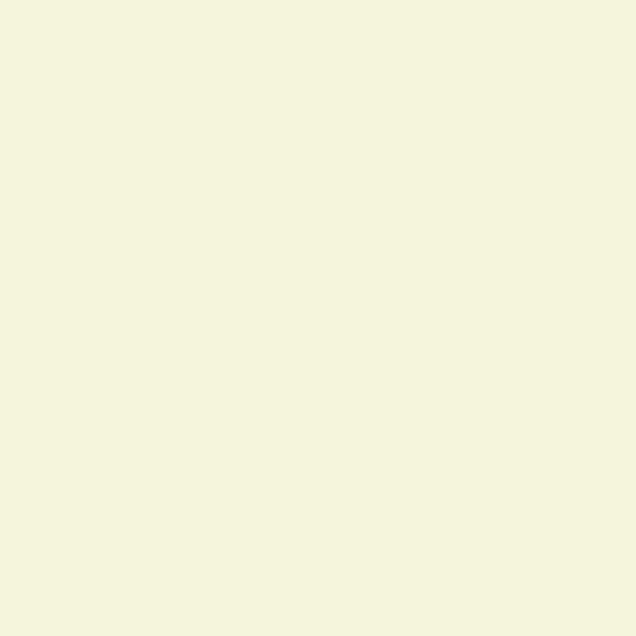

In [36]:
max_level_1_value = mcts.get_max_value_level_1()


fig, ax = p_utils.init_3d_figure(name="Level wise 1")

# nodes = mcts.infeasible_sub_nodes[0]
# nodes = mcts.history_level_1_dict[4]['nodes']
j, nodes = mcts.get_max_value_nodes_level_1()

print("nodes", nodes)
i = 0
for i in range(len(nodes)//2):
    mcts.rearr_action.deepcopy_scene(mcts.tree.nodes[nodes[2*(i)+1]]['state'])
    
    grasp = mcts.tree.nodes[nodes[2*(i)+1]].get('grasp_poses')
    if grasp:
        grasp = grasp[0]['grasp']
    else:
        print("Here doesn't have grasp")
        
        mcts.rearr_action.scene_mngr.render_objects(ax)
        p_utils.plot_basis(ax)
        mcts.rearr_action.show()
        break
    mcts.rearr_action.scene_mngr.set_gripper_pose(grasp)
    
    gripper_kinematics_info = mcts.rearr_action.scene_mngr.scene.robot.gripper.get_gripper_fk()

    gripper_tip_poses = mcts.scene_mngr.scene.robot.gripper.compute_gripper_tip_pose_from_gripper_pose()


    mcts.rearr_action.scene_mngr.render_axis(ax, gripper_kinematics_info['leftfinger'])
    mcts.rearr_action.scene_mngr.render_axis(ax, gripper_kinematics_info['rightfinger'])
    mcts.rearr_action.scene_mngr.render_axis(ax, mcts.scene_mngr.scene.robot.gripper.compute_gripper_tip_pose_from_gripper_pose(gripper_kinematics_info['rightfinger']))
    mcts.rearr_action.scene_mngr.render_axis(ax, mcts.scene_mngr.scene.robot.gripper.compute_gripper_tip_pose_from_gripper_pose(gripper_kinematics_info['leftfinger']))

    mcts.rearr_action.scene_mngr.render_axis(ax, mcts.rearr_action.scene_mngr.scene.robot.gripper.get_gripper_tcp_pose())
    mcts.rearr_action.scene_mngr.render_gripper(ax)

    mcts.rearr_action.scene_mngr.render_objects(ax)
    p_utils.plot_basis(ax)
    mcts.rearr_action.show()

각 node에서 생성한 grasp을 inverse kinematics를 풀어보자 


엄청 쉬워보이는 자세인데 왜 IK 실패를 할까

In [39]:
def show_curernt_scene(q, pose):
    fig, ax = p_utils.init_3d_figure(name="Level wise 1")
    
    mcts.rearr_action.scene_mngr.set_robot_eef_pose(q)
    mcts.rearr_action.scene_mngr.render_axis(ax, mcts.rearr_action.scene_mngr.scene.robot.gripper.get_gripper_pose())
    mcts.rearr_action.scene_mngr.render_gripper(ax)
    
    mcts.rearr_action.scene_mngr.set_gripper_pose(pose)
    mcts.rearr_action.scene_mngr.render_axis(ax, mcts.rearr_action.scene_mngr.scene.robot.gripper.get_gripper_pose())
    mcts.rearr_action.scene_mngr.render_gripper(ax)

    mcts.rearr_action.scene_mngr.render_objects(ax)
    p_utils.plot_basis(ax)
    mcts.rearr_action.show()

여기서 실패가 나는게 말이 안됨..

In [40]:
default_thetas = mcts.rearr_action.scene_mngr.scene.robot.init_qpos

for _, i in enumerate(nodes):
    if _ < 1:
        continue
    if _%2 == 1:
        continue
        
    print("Current state node num : ",i)
    print("Current state is came from last action")
    
    mcts.rearr_action.deepcopy_scene(mcts.tree.nodes[nodes[2*_-1]]['state'])

    last_action_node = mcts.tree.nodes[nodes[2*_+1]]
    current_state_node = mcts.tree.nodes[i]
    
    print(current_state_node['action']['pre_grasp'])
    pre_grasp_pose = current_state_node['action']['pre_grasp']
    grasp_pose = current_state_node['action']['grasp']
    post_grasp_pose = current_state_node['action']['post_grasp']
    
    pre_release_pose = current_state_node['action']['pre_release']
    release_pose = current_state_node['action']['release']
    post_release_pose = current_state_node['action']['post_release']
    
    obj_release_pose = current_state_node['action']['table']
    # Set Scene
    mcts.rearr_action.scene_mngr.set_robot_eef_pose(default_thetas)
    rearr_obj_name = current_state_node['state'].rearr_obj_name
    rearr_default_pose = current_state_node['state'].rearr_obj_default_pose
    print("rearr_obj_name : ", rearr_obj_name)
    
    mcts.rearr_action.scene_mngr.set_object_pose(rearr_obj_name, rearr_default_pose)

    show_curernt_scene(default_thetas ,pre_grasp_pose)
    print("default 부터 Pre grasp까지 IK 품")
    
    goal_q = mcts.rearr_action.scene_mngr.scene.robot.inverse_kin(
            default_thetas, pre_grasp_pose, max_iter=100
        )
    
    show_curernt_scene(goal_q, grasp_pose)
    print("pre_grasp 부터 grasp까지 IK 품")
    goal_q = mcts.rearr_action.scene_mngr.scene.robot.inverse_kin(
        goal_q, grasp_pose, max_iter=100
    )
    
    show_curernt_scene(goal_q, post_grasp_pose)
    print("grasp 부터 post_grasp까지 IK 품")
    goal_q = mcts.rearr_action.scene_mngr.scene.robot.inverse_kin(
        goal_q, post_grasp_pose, max_iter=100
    )
    
    mcts.rearr_action.scene_mngr.set_robot_eef_pose(default_thetas)

    mcts.rearr_action.scene_mngr.set_object_pose(rearr_obj_name, obj_release_pose)

    show_curernt_scene(default_thetas, post_release_pose)
    print("default 부터 post_release까지 IK 품")
    goal_q = mcts.rearr_action.scene_mngr.scene.robot.inverse_kin(
        default_thetas, pre_release_pose, max_iter=100
    )
    
    show_curernt_scene(goal_q, release_pose)
    print("release 부터 post_release까지 IK 품")
    goal_q = mcts.rearr_action.scene_mngr.scene.robot.inverse_kin(
        goal_q, release_pose, max_iter=100
    )
    
    show_curernt_scene(goal_q, post_release_pose)
    print("post_release 부터 post_release까지 IK 품")
    goal_q = mcts.rearr_action.scene_mngr.scene.robot.inverse_kin(
        goal_q, release_pose, max_iter=100
    )
    
    break

Current state node num :  10
Current state is came from last action
[[ 1.7347235e-18  3.7369016e-01  9.2755359e-01  2.7714780e-01]
 [-4.5109000e-02  9.2660940e-01 -3.7330979e-01 -1.5398476e-01]
 [-9.9898207e-01 -4.1841015e-02  1.6856790e-02  8.5422677e-01]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00  1.0000000e+00]]


KeyError: 'pre_release'

In [41]:
########## level 1 ##########
if mcts.history_level_2_dict:
    j, max_value_nodes = mcts.get_max_value_nodes_level_1()
    print(f"Result {j} : ", max_value_nodes)
    print("state num :", len(max_value_nodes))
    mcts.render_rearr("_", max_value_nodes)

In [68]:
mcts.tree.nodes[172]['action']['rearr_poses'][0][0]

{'release': array([[-0.035319  ,  0.49304995, -0.8692838 ,  0.6695346 ],
        [ 0.02806048, -0.8689943 , -0.49402586,  0.3249112 ],
        [-0.9989821 , -0.04184102,  0.01685679,  0.85591245],
        [ 0.        ,  0.        ,  0.        ,  1.        ]],
       dtype=float32),
 'pre_release': array([[-0.035319  ,  0.49304995, -0.8692838 ,  0.6695346 ],
        [ 0.02806048, -0.8689943 , -0.49402586,  0.3249112 ],
        [-0.9989821 , -0.04184102,  0.01685679,  0.90591246],
        [ 0.        ,  0.        ,  0.        ,  1.        ]],
       dtype=float32),
 'post_release': array([[-0.035319  ,  0.49304995, -0.8692838 ,  0.7129988 ],
        [ 0.02806048, -0.8689943 , -0.49402586,  0.3496125 ],
        [-0.9989821 , -0.04184102,  0.01685679,  0.85506964],
        [ 0.        ,  0.        ,  0.        ,  1.        ]],
       dtype=float32)}

# Pick action 사용하는 버전 전용 디버깅

nodes [0, 1, 29, 136, 137, 139, 211, 214, 215, 218, 219, 223, 224, 225, 231, 236, 237, 238, 243, 247, 248, 251, 255, 258, 259, 260, 267, 268, 269]
1
136
139
214
218
223
225
236
238
247
251
258
260
268


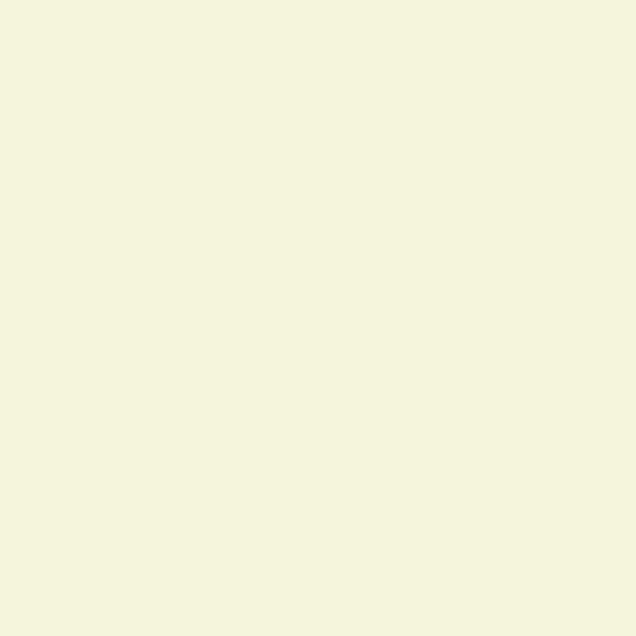

In [10]:
max_level_1_value = mcts.get_max_value_level_1()

fig, ax = p_utils.init_3d_figure(name="Level wise 1")

j, nodes = mcts.get_max_value_nodes_level_1()

print("nodes", nodes)
i = 0
for i in range(len(nodes)//2):
    print(nodes[2*(i)+1])
    mcts.rearr_action.deepcopy_scene(mcts.tree.nodes[nodes[2*(i)+1]]['state'])
    
    action_type = mcts.tree.nodes[nodes[2*(i)+1]].get('action').get('type')
    if action_type == 'pick':
        grasp = mcts.tree.nodes[nodes[2*(i)+1]].get('action').get('grasp_poses')
        if grasp:
            grasp = grasp[0]['grasp']
        else:
            print("Here doesn't have grasp")
            mcts.rearr_action.scene_mngr.render_objects(ax)
            p_utils.plot_basis(ax)
            mcts.rearr_action.show()
            break
    if action_type == 'rearr':
        grasp = mcts.tree.nodes[nodes[2*(i)+1]].get('action').get('rearr_poses')[0]
        if grasp:
            grasp = grasp[0].get('release')
        else:
            print("Here doesn't have grasp")

            mcts.rearr_action.scene_mngr.render_objects(ax)
            p_utils.plot_basis(ax)
            mcts.rearr_action.show()
            break
    mcts.rearr_action.scene_mngr.set_gripper_pose(grasp)
    
    gripper_kinematics_info = mcts.rearr_action.scene_mngr.scene.robot.gripper.get_gripper_fk()

    gripper_tip_poses = mcts.scene_mngr.scene.robot.gripper.compute_gripper_tip_pose_from_gripper_pose()


    mcts.rearr_action.scene_mngr.render_axis(ax, gripper_kinematics_info['leftfinger'])
    mcts.rearr_action.scene_mngr.render_axis(ax, gripper_kinematics_info['rightfinger'])
    mcts.rearr_action.scene_mngr.render_axis(ax, mcts.scene_mngr.scene.robot.gripper.compute_gripper_tip_pose_from_gripper_pose(gripper_kinematics_info['rightfinger']))
    mcts.rearr_action.scene_mngr.render_axis(ax, mcts.scene_mngr.scene.robot.gripper.compute_gripper_tip_pose_from_gripper_pose(gripper_kinematics_info['leftfinger']))

    mcts.rearr_action.scene_mngr.render_axis(ax, mcts.rearr_action.scene_mngr.scene.robot.gripper.get_gripper_tcp_pose())
    mcts.rearr_action.scene_mngr.render_gripper(ax)

    mcts.rearr_action.scene_mngr.render_objects(ax)
    p_utils.plot_basis(ax)
    mcts.rearr_action.show()

In [9]:
max_value_nodes = mcts.get_minimum_cost_node()

## Save path 

In [10]:
final_level_1_values = []
final_level_2_values = []
final_optimal_nodes = []
final_pnp_all_joint_paths = []
final_pick_all_objects = []
final_place_all_object_poses = []
if mcts.level_wise_2_success:
    (
        pnp_all_joint_paths,
        pick_all_objects,
        place_all_object_poses,
    ) = mcts.get_all_joint_path(max_value_nodes)
    final_pnp_all_joint_paths.append(pnp_all_joint_paths)
    final_pick_all_objects.append(pick_all_objects)
    final_place_all_object_poses.append(place_all_object_poses)
    final_optimal_nodes.append(mcts.optimal_nodes)
else:
    final_pnp_all_joint_paths.append([])
    final_pick_all_objects.append([])
    final_place_all_object_poses.append([])
    final_optimal_nodes.append([])

In [11]:
for i in max_value_nodes:
    if not mcts.tree.nodes[i]['level1_5']:
        print("Error 1.5", i)
for i in max_value_nodes:
    if not mcts.tree.nodes[i]['level2']:
        print("Error 2", i)
        

Error 1.5 0
Error 1.5 4
Error 1.5 66
Error 1.5 122
Error 1.5 124
Error 1.5 127
Error 1.5 129
Error 1.5 131
Error 1.5 132
Error 1.5 134
Error 1.5 500
Error 1.5 502
Error 1.5 503
Error 1.5 506
Error 1.5 507
Error 1.5 509
Error 1.5 510
Error 1.5 511
Error 1.5 518
Error 1.5 519
Error 1.5 520
Error 1.5 522
Error 1.5 525
Error 1.5 529
Error 1.5 530


0 scene
100 scene
200 scene
300 scene
400 scene
500 scene
600 scene
700 scene
800 scene
900 scene
Animation Finished..
PWD :  /home/juju/pytamp/examples/doosan/action/rearrangement1/movie_dir
Save finished..


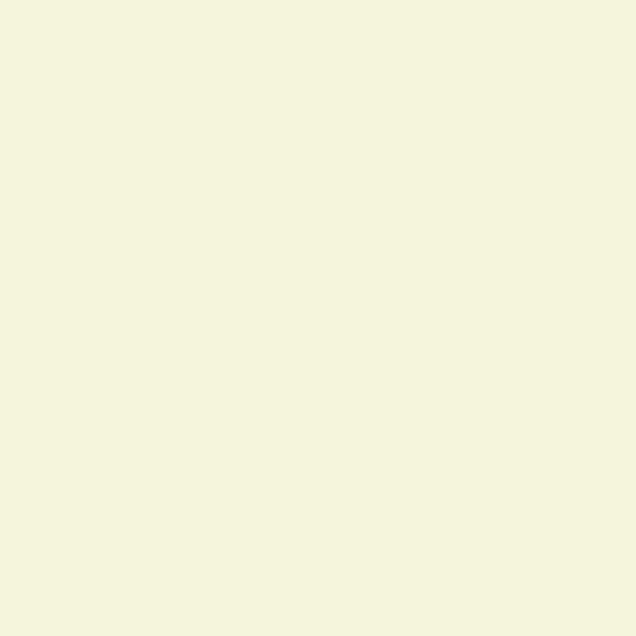

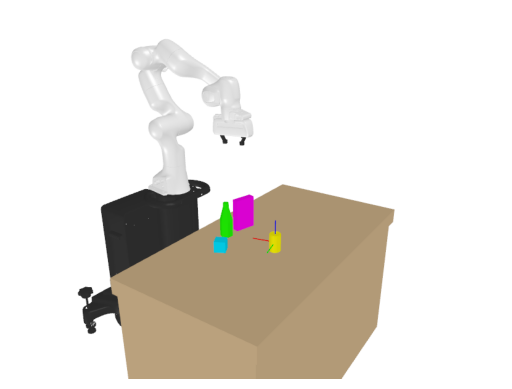

In [12]:
from pykin.utils.kin_utils import apply_robot_to_scene

mcts.rearr_action.scene_mngr.render.render_objects(mcts.tree.nodes[0]['state'].objs)
# pick.scene_mngr.render.trimesh_scene = apply_robot_to_scene(
#         trimesh_scene=pick.scene_mngr.render.trimesh_scene, 
#         robot=pick.scene_mngr.scene.robot,
#         geom="visual"
#             )
# pick.scene_mngr.render.set_camera_view()

mcts.rearr_action.simulate_path(
    final_pnp_all_joint_paths[0],
    final_pick_all_objects[0],
    final_place_all_object_poses[0],
    is_save=True,
#     video_name="pick_rearrangement1_only_current_scene",
    video_name="pick_rearrangement1_using_pick_action_minimum_cost_nodes",
)


In [20]:
count = 0
for i in mcts.tree.nodes:
    if mcts.tree.nodes[i]['visit']>1:
        count += 1
count

24

In [7]:
count = 0
for i in mcts.tree.nodes:
    if mcts.tree.nodes[i]['visit']>1:
        count += 1
count

17

In [30]:
for i in raz

{'depth': 1,
 'state': <pytamp.scene.scene.Scene at 0x7fda17004a00>,
 'action': {'type': 'pick',
  'pick_obj_name': 'can0',
  'grasp_poses': [{'grasp': array([[ 0.        ,  0.59427848,  0.80425934,  0.38289493],
           [ 0.00525198,  0.80424825, -0.59427028, -0.17083556],
           [-0.99998621,  0.00422396, -0.00312114,  0.86611772],
           [ 0.        ,  0.        ,  0.        ,  1.        ]]),
    'pre_grasp': array([[ 0.        ,  0.59427845,  0.80425936,  0.30246902],
           [ 0.00525198,  0.8042483 , -0.5942703 , -0.11140853],
           [-0.99998623,  0.00422396, -0.00312114,  0.8664298 ],
           [ 0.        ,  0.        ,  0.        ,  1.        ]],
          dtype=float32),
    'post_grasp': array([[ 0.        ,  0.59427845,  0.80425936,  0.38289493],
           [ 0.00525198,  0.8042483 , -0.5942703 , -0.17083555],
           [-0.99998623,  0.00422396, -0.00312114,  0.96611774],
           [ 0.        ,  0.        ,  0.        ,  1.        ]],
          dtype

In [28]:
nodes = [0, 3, 10, 172, 173, 175, 180, 388, 389, 392, 591, 592, 593, 594, 598, 601, 602, 604, 607, 609, 610]

In [33]:
for i in nodes:
    print(mcts.tree.nodes[i]["level2"])

True
True
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False



# Level 1에서 무조건 좋아질 조합 찾고 Path 계산해도 Cost가 무조건 좋아져야하는데 안됨. 

분석  : 이미 성공한 list에서 cost 계산


In [62]:
mcts.get_best_node()

[0, 1, 82, 84, 88, 94, 1254, 1256, 1473, 1476, 1478]

In [63]:
max_value_nodes

[0, 4, 205, 206, 706, 709, 1608, 1610, 1614, 1618, 1619]

In [20]:
def get_minimum_cost_node():
    min_cost = 100
    min_cost_nodes = []
    for i, n in mcts.history_level_2_dict.items():
        cost = 0
        print(i,n)
        for n_num in n['nodes']:
            cost += mcts.tree.nodes[n_num].get('cost')
        if min_cost > cost:
            min_cost = cost
            min_cost_nodes = n['nodes']
    return min_cost_nodes
        

In [21]:
get_minimum_cost_node()

0 {'nodes': [0, 7, 446, 449, 644, 645, 650, 654, 656, 661, 662, 664, 668, 669, 674, 678, 679, 682, 684], 'value': 8.053283}
1 {'nodes': [0, 7, 446, 449, 644, 647, 802, 804, 808, 812, 814, 818, 819, 822, 823, 825, 828, 832, 833, 837, 838], 'value': 8.525124}
2 {'nodes': [0, 7, 446, 449, 644, 648, 839, 843, 845, 846, 849], 'value': 14.897667}
3 {'nodes': [0, 7, 446, 449, 644, 648, 839, 841, 1193, 1194, 1196], 'value': 14.938767}
4 {'nodes': [0, 7, 446, 450, 452, 454, 1487, 1490, 1492], 'value': 14.938767}


[0, 7, 446, 450, 452, 454, 1487, 1490, 1492]